In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [486]:
df = pd.read_csv('Titanic-Dataset.csv').copy()

In [487]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [488]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


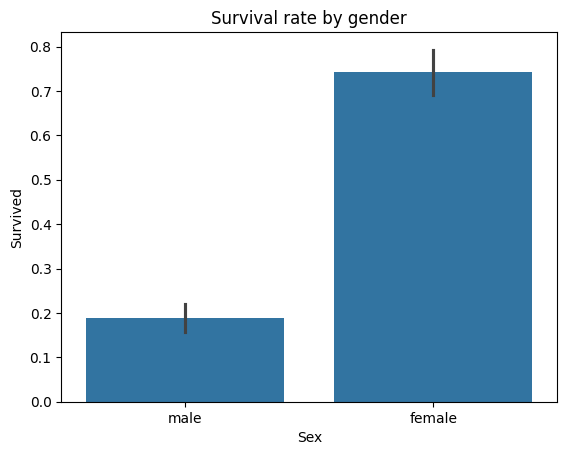

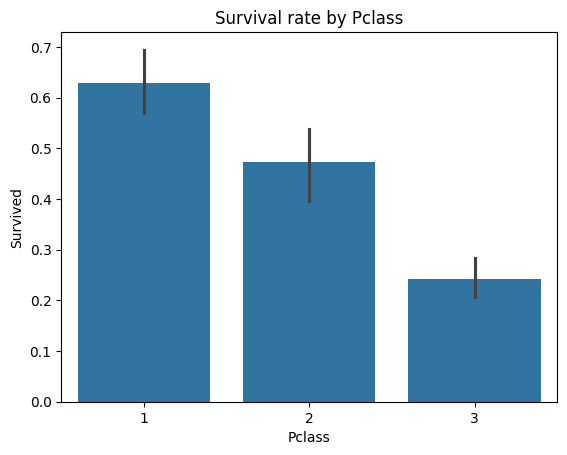

In [489]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)
plt.title('Survival rate by gender')
plt.show()

sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.title('Survival rate by Pclass')
plt.show()



In [490]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [491]:
# Filling Null-Values by taking median of Ages

df['Age'].fillna(df['Age'].median(), inplace = True)

C:\Users\sobaa\AppData\Local\Temp\ipykernel_20372\223746223.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [492]:
# Dropping columns as there are of no use 

df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)

In [493]:
# Converting categorical columns into numerical columns for further calculations

df['Sex'] = df['Sex'].map({'male' : 0, 'female' : 1})
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})


In [494]:
# Filling null-values by taking mode

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

C:\Users\sobaa\AppData\Local\Temp\ipykernel_20372\1561996811.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [495]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [496]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


Data Cleaning and Transforming has been done!!!

In [497]:
# Splitting data into dependent and independent varaibles

Dependent_variable = df['Survived']
Independent_factors = df.drop('Survived', axis = 1)

In [498]:
Dependent_variable.head() 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [499]:
Independent_factors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


In [500]:
# Splitting data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(Independent_factors, Dependent_variable, test_size = 0.2, random_state = 42)

In [501]:
model_1 = LogisticRegression()

In [502]:
model_1.fit(X_train, Y_train)

C:\Users\sobaa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [503]:
pred_1 = model.predict(X_test)

In [504]:
accuracy_1 = accuracy_score(Y_test, pred)

In [505]:
print(f'Model_1 Accuracy Score: {accuracy_1*100:.2f}%')

Model_1 Accuracy Score: 79.89%


In [506]:
model_2 = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [507]:
model_2.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [508]:
pred_2 = model_2.predict(X_test)

In [509]:
accuracy_2 = accuracy_score(Y_test, pred_2)

In [510]:
print(f'Model_2 Accuracy Score: {accuracy_2*100:.2f}%')

Model_2 Accuracy Score: 82.68%


We can see that Model_2 works more efficiently!!!